# Neural Networks with Keras - Solutions
Need to install some packages

    # Try conda first
    conda install keras
    conda install tensorflow

    # or try pip
    pip install keras
    pip install tensorflow

In [1]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.model_selection as cv

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Neural Network Regression
### Polynomial Regression
Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [2]:
# Create some data
def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))
print(X.shape, y.shape)

(1000, 1) (1000, 1)


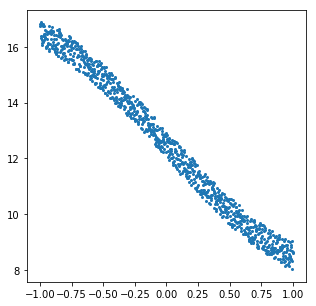

In [3]:
plt.figure(figsize = (5, 5))
plt.scatter(X, y, s = 4)
plt.show()

In [4]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(input_dim = 1, output_dim = 5))
model.add(Activation("tanh"))
model.add(Dense(input_dim = 5, output_dim = 1))
model.add(Activation("linear"))

# lr: learning rate
model.compile(loss = "mse", optimizer = SGD(lr = 0.01))

In [5]:
%%time
# Train the model
print("Training...")
loss = model.fit(X, y,
                 nb_epoch = 500,
                 validation_split = 0.1,
                 batch_size = 128,
                 verbose = False)
print("Done")
print("MSE at last epoch: %.4f" % loss.history["loss"][-1])   # displays MSE at last iteration

Training...
Done
MSE at last epoch: 0.0836
CPU times: user 6.25 s, sys: 3.35 s, total: 9.59 s
Wall time: 5.17 s


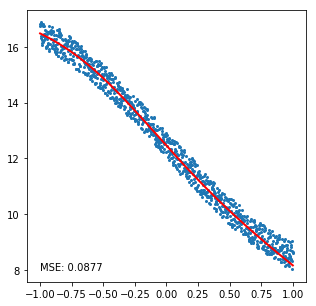

In [6]:
# Plot the predictions
predictions = model.predict(X)

plt.figure(figsize = (5, 5))
plt.scatter(X, y, s = 4)
plt.plot(X, predictions, color = "r", linewidth = 2)
plt.text(-1, 8, "MSE: %.4f" % mean_squared_error(predictions, y))
plt.show()

### Sine Regression

In [7]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1, 1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


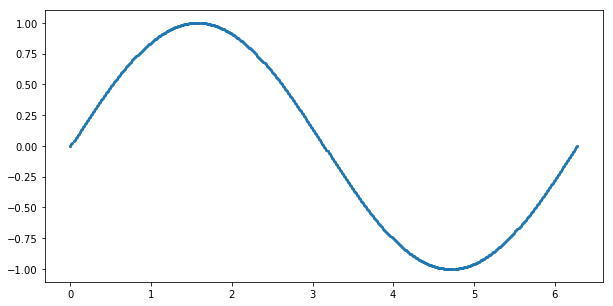

In [8]:
plt.figure(figsize = (10, 5))
plt.scatter(X, y, s = 4)
plt.show()

In [9]:
# Create the model
model = Sequential()
model.add(Dense(input_dim = 1, output_dim = 5))
model.add(Activation("tanh"))
model.add(Dense(input_dim = 5, output_dim = 1))
model.add(Activation("linear"))

# lr: learning rate
model.compile(loss = "mse", optimizer = SGD(lr = 0.1))

### Train the Model

In [10]:
%%time
print("Training...")
loss = model.fit(X, y,
                 nb_epoch = 150,
                 validation_split = 0.1,
                 batch_size = 128,
                 verbose = False)
print("Complete")
print('MSE at last epoch: %.4f' % loss.history["loss"][-1])   # displays MSE at last iteration

Training...
Complete
MSE at last epoch: 0.0138
CPU times: user 1.34 s, sys: 547 ms, total: 1.89 s
Wall time: 1.15 s


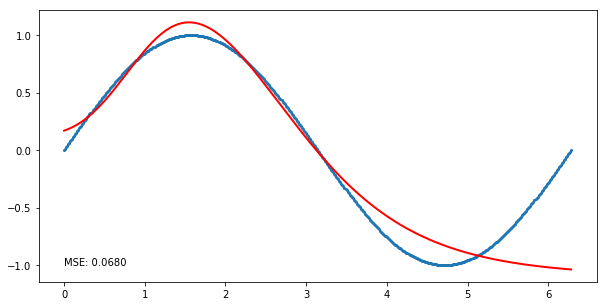

In [11]:
# Plot the predictions
predictions = model.predict(X)

plt.figure(figsize = (10, 5))
plt.scatter(X, y, s = 4)
plt.plot(X, predictions, color = "r", linewidth = 2)
plt.text(0, -1, "MSE: %.4f" % mean_squared_error(predictions, y))
plt.show()

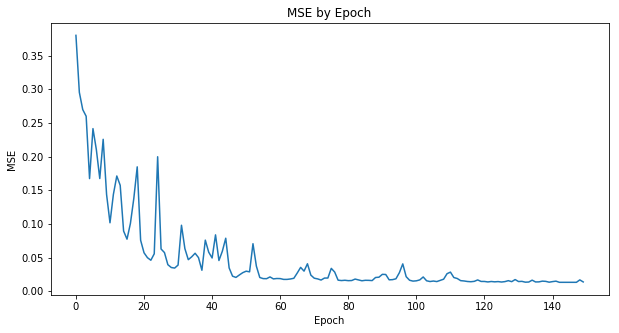

In [12]:
# Plot the error over time
plt.figure(figsize = (10, 5))
plt.plot(range(len(loss.history["loss"])), loss.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE by Epoch")
plt.show()

### Train longer
If we train for more epochs, we can get a better regression.

In [13]:
%%time
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1, 1)
y = np.sin(X)
print(X.shape, y.shape)

model = Sequential()
model.add(Dense(input_dim = 1, output_dim = 5))
model.add(Activation("tanh"))
model.add(Dense(input_dim = 5, output_dim = 1))
model.add(Activation("linear"))

# lr: learning rate
model.compile(loss = "mse", optimizer = SGD(lr = 0.05))

print("Training...")
loss = model.fit(X, y,
                 nb_epoch = 15000,
                 validation_split = 0.1,
                 batch_size = 128,
                 verbose = False)
print("Complete")
print("MSE at last epoch: %.4f" % loss.history["loss"][-1])   # displays MSE at last iteration
predictions = model.predict(X)

(1000, 1) (1000, 1)
Training...
Complete
MSE at last epoch: 0.0000
CPU times: user 3min 6s, sys: 1min 42s, total: 4min 48s
Wall time: 2min 31s


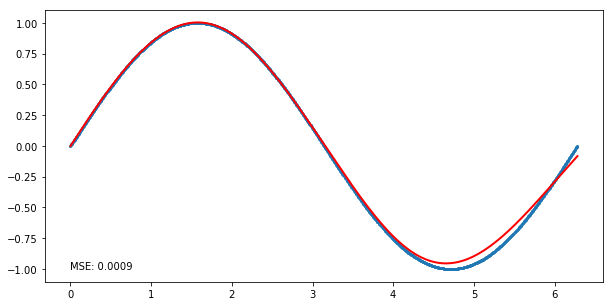

In [14]:
# Plot
plt.figure(figsize = (10, 5))
plt.scatter(X, y, s = 4)
plt.plot(X, predictions, color = "r", linewidth = 2)
plt.text(0, -1, "MSE: %.4f" % mean_squared_error(predictions, y))
plt.show()

We can take a closer look at the error per training epoch.

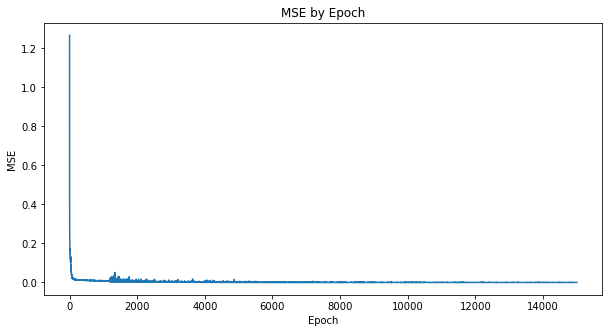

In [15]:
# Plot the error over time
plt.figure(figsize = (10, 5))
plt.plot(range(len(loss.history["loss"])), loss.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE by Epoch")
plt.show()

### Exercise: Perform regression the following data
Hints:
- Try adding a hidden layer
- Try lowering the learning rate and using more epochs

In [16]:
def f(x):
    return x ** 2 * np.sin(x ** 2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))
print(X.shape, y.shape)

(1000, 1) (1000, 1)


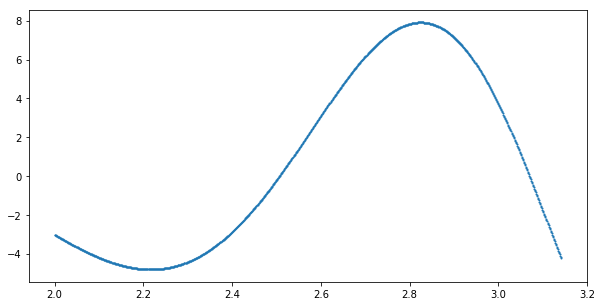

In [17]:
plt.figure(figsize = (10, 5))
plt.scatter(X, y, s = 1)
plt.show()

In [18]:
%%time
# Solution
model = Sequential()
model.add(Dense(input_dim = 1, output_dim = 5))
model.add(Activation("tanh"))
model.add(Dense(input_dim = 5, output_dim = 5))
model.add(Activation("tanh"))
model.add(Dense(input_dim = 5, output_dim = 1))
model.add(Activation("linear"))

# lr: learning rate
model.compile(loss = "mse", optimizer = SGD(lr = 0.005))

print("Training...")
loss = model.fit(X, y,
                 nb_epoch = 10000,
                 validation_split = 0.1,
                 batch_size = 128,
                 verbose = False)
print("Complete")
print("MSE at last epoch: %.4f" % loss.history["loss"][-1])   # displays MSE at last iteration
predictions = model.predict(X)

Training...
Complete
MSE at last epoch: 0.0937
CPU times: user 2min 16s, sys: 1min 22s, total: 3min 39s
Wall time: 1min 51s


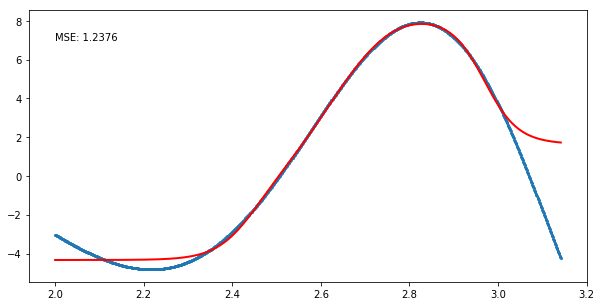

In [19]:
# Plot
plt.figure(figsize = (10, 5))
plt.scatter(X, y, s = 4)
plt.plot(X, predictions, color = "r", linewidth = 2)
plt.text(2, 7, "MSE: %.4f" % mean_squared_error(predictions, y))
plt.show()

## Classification
We will start with the Iris data set (of course).

In [20]:
import sklearn.datasets as datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values
print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [21]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim = k features.
model.add(Dense(input_dim = 4, output_dim = 4))
model.add(Activation("tanh"))

# Output layer - output_dim = # of output per point (in y).
# Use "softmax" for class probability. "linear" for regression
model.add(Dense(input_dim = 4, output_dim = 3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss = "mse", optimizer = SGD(lr = 0.01))

In [22]:
%%time
# Train the model
print("Training...")
loss = model.fit(X, y_cat, 
                 validation_split = 0.1,
                 nb_epoch = 5000,
                 batch_size = 16,
                 verbose = False)
print("Complete")
print("MSE at last epoch: %.4f" % loss.history["loss"][-1])   # displays MSE at last iteration

Training...
Complete
MSE at last epoch: 0.0126
CPU times: user 1min 8s, sys: 37.7 s, total: 1min 45s
Wall time: 55 s


In [23]:
def print_confusion_matrix(y, preds):
    cm = confusion_matrix(y, preds)
    r, c = cm.shape
    print("Confusion Matrix")
    for i in range(r):
        for j in range(c):
            print("%5d" % cm[i, j], end = "")
        print()

In [24]:
# Model evaluation
pred_y = model.predict(X, verbose = False)
preds  = model.predict_classes(X, verbose = False)

print("Accuracy: %.4f" % accuracy_score(y, preds))
print_confusion_matrix(y, preds)

Accuracy: 0.9800
Confusion Matrix
   50    0    0
    0   47    3
    0    0   50


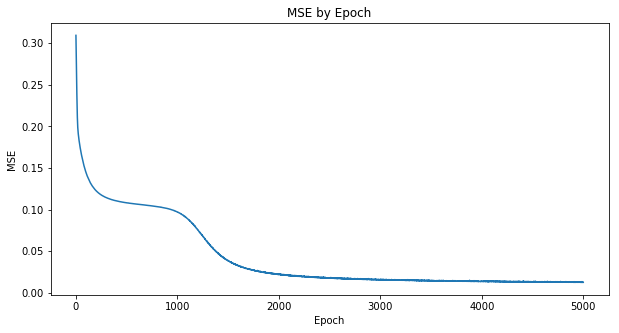

In [25]:
# Plot the error over time
plt.figure(figsize = (10, 5))
plt.plot(range(len(loss.history["loss"])), loss.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE by Epoch")
plt.show()

## Abalone data set

In [26]:
columns = ["Sex",            "Length",       "Diameter",
           "Height",         "Whole Weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv("../../../../data/abalone.data", header = 1, names = columns)
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


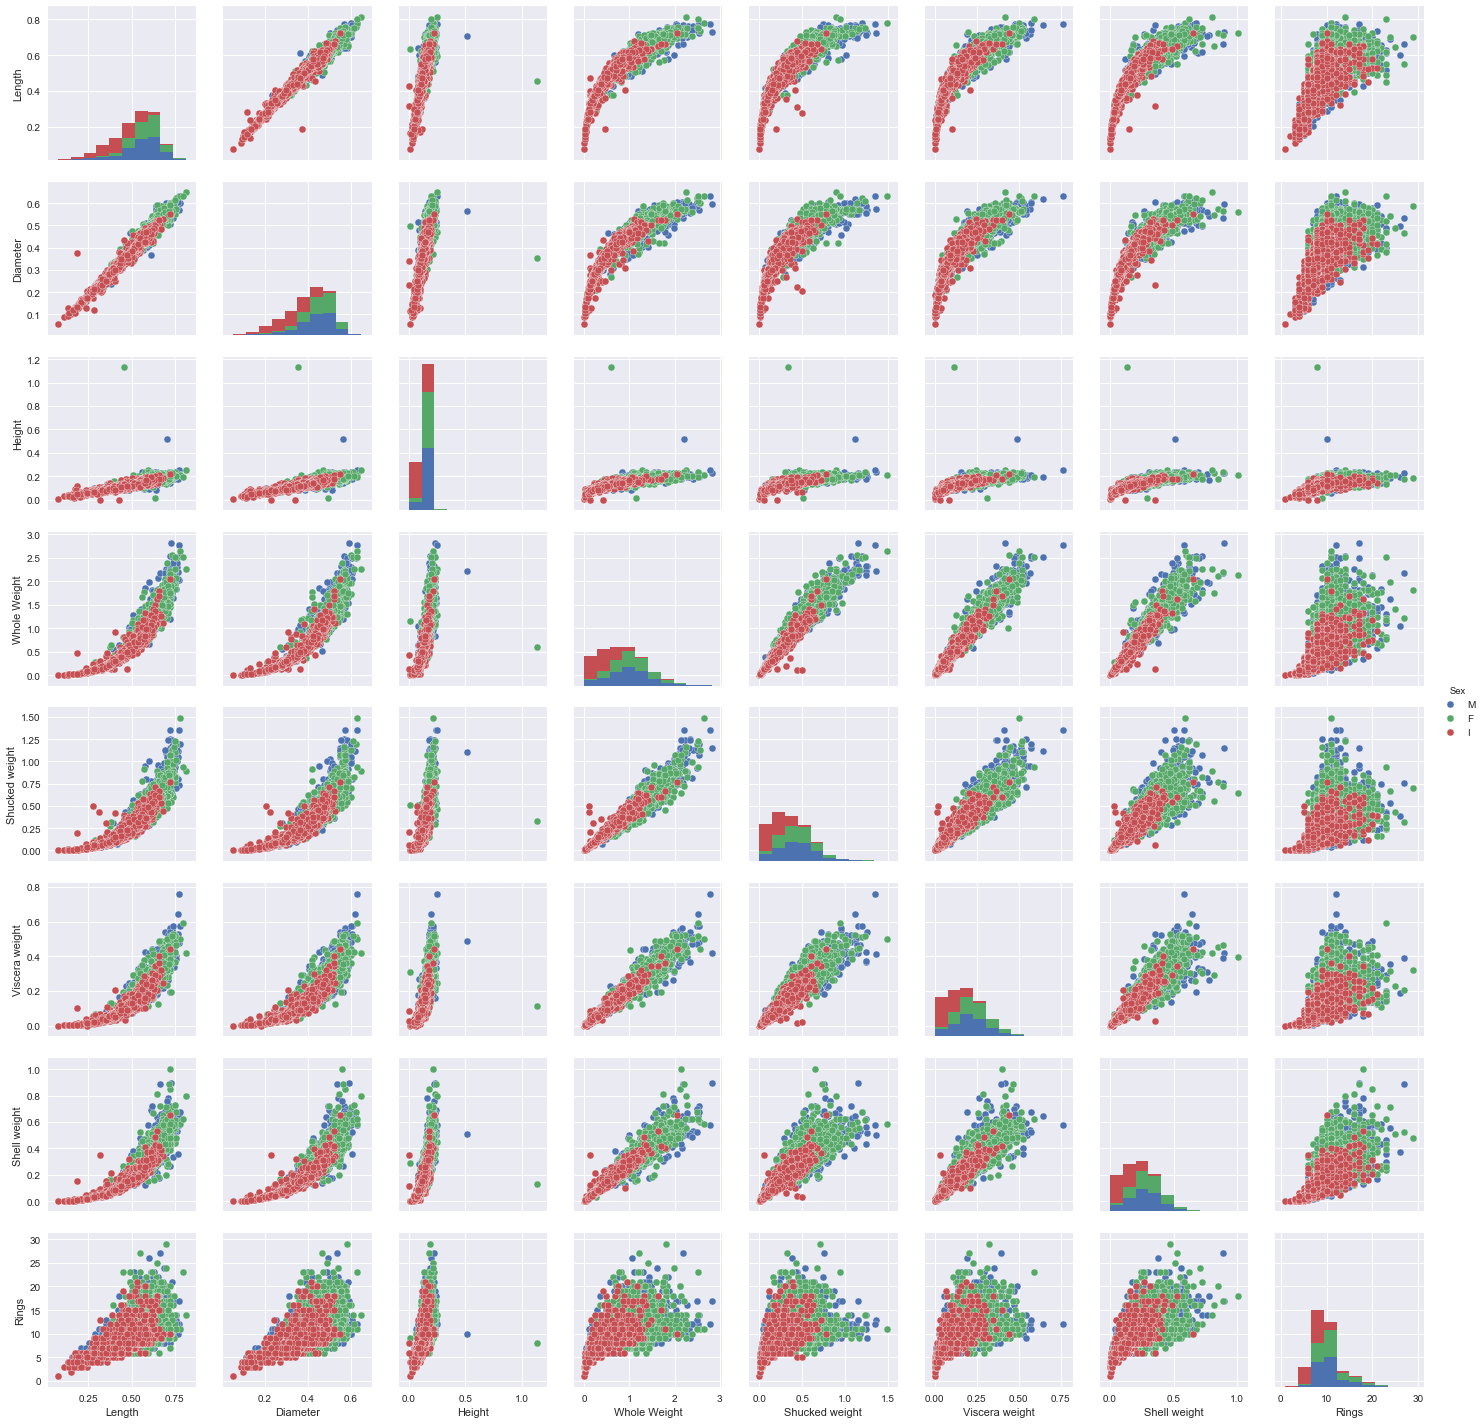

In [27]:
import seaborn as sns
sns.pairplot(data = df, vars = columns[1:], hue = "Sex")
plt.show()

In [28]:
d = {"M": 0, "F": 1, "I": 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [29]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values
print(X.shape, y_cat.shape)

(4176, 8) (4176, 3)


In [30]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim = k features.
model.add(Dense(input_dim = 8, output_dim = 6))
model.add(Activation("tanh"))

model.add(Dense(input_dim = 6, output_dim = 6))
model.add(Activation("tanh"))

# Output layer - output_dim = # of output per point (in y).
# Use "softmax" for class probability. "linear" for regression
model.add(Dense(input_dim = 6, output_dim = 3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss = "mse", optimizer = SGD(lr = 0.1))

In [31]:
%%time
# Train the model
print("Training...")
loss = model.fit(X, y_cat, 
                 validation_split = 0.1,
                 nb_epoch = 1000,
                 batch_size = 16,
                 verbose = False)
print("Complete")
print("MSE at last epoch: %.4f" % loss.history["loss"][-1])   # displays MSE at last iteration

Training...
Complete
MSE at last epoch: 0.1734
CPU times: user 7min, sys: 4min 12s, total: 11min 13s
Wall time: 5min 40s


In [33]:
# Model evaluation
pred_y = model.predict(X, verbose = False)
preds  = model.predict_classes(X, verbose = False)

print("Accuracy: %.4f" % accuracy_score(y, preds))
print_confusion_matrix(y, preds)

Accuracy: 0.5529
Confusion Matrix
 1121  139  267
 1000  159  148
  257   56 1029


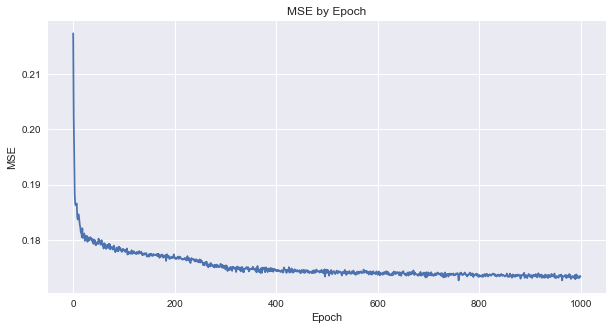

In [34]:
# Plot the error over time
plt.figure(figsize = (10, 5))
plt.plot(range(len(loss.history["loss"])), loss.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE by Epoch")
plt.show()

## Exercise
Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You will need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [35]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("../../../../data/magic04.data", names = names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [36]:
d = {"g": 0, "h": 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [37]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values
print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [38]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim = k features.
model.add(Dense(input_dim = 10, output_dim = 6))
model.add(Activation("tanh"))

model.add(Dense(input_dim = 6, output_dim = 6))
model.add(Activation("tanh"))

# Output layer - output_dim = # of output per point (in y).
# Use "softmax" for class probability. "linear" for regression
model.add(Dense(input_dim = 6, output_dim = 2))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss = "mse", optimizer = SGD(lr = 0.01))

In [39]:
%%time
# Train the model
print("Training...")
loss = model.fit(X, y_cat,
                 validation_split = 0.2,
                 nb_epoch = 1000,
                 batch_size = 256,
                 verbose = False)
print("Complete")
print("MSE at last epoch: %.4f" % loss.history["loss"][-1])   # displays MSE at last iteration

Training...
Complete
MSE at last epoch: 0.1165
CPU times: user 2min 3s, sys: 1min 3s, total: 3min 7s
Wall time: 1min 38s


In [40]:
# Model evaluation
pred_y = model.predict(X, verbose = False)
preds  = model.predict_classes(X, verbose = False)

print("Accuracy: %.4f" % accuracy_score(y, preds))
print_confusion_matrix(y, preds)

Accuracy: 0.7650
Confusion Matrix
11749  583
 3887 2801


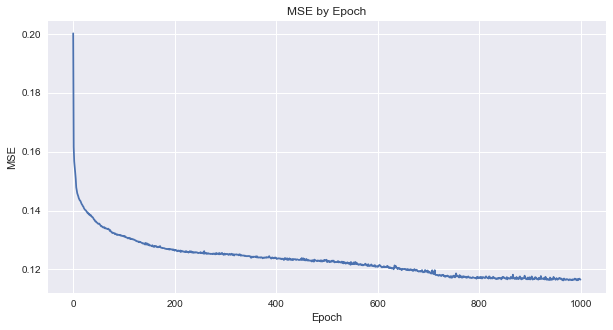

In [41]:
# Plot the error over time
plt.figure(figsize = (10, 5))
plt.plot(range(len(loss.history["loss"])), loss.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE by Epoch")
plt.show()